In [27]:
import pickle
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open('train_features1.pkl',mode='rb')as file:
    train_features1=pickle.load(file)
with open('train_labels.pkl',mode='rb')as file:
    train_labels=pickle.load(file)
with open('test_features1.pkl',mode='rb')as file:
    test_features1=pickle.load(file)
with open('test_labels.pkl',mode='rb')as file:
    test_labels=pickle.load(file)
with open('dataframe.pkl',mode='rb')as file:
    df=pickle.load(file)

In [3]:
mnbc = MultinomialNB()
mnbc

MultinomialNB()

In [4]:
mnbc.fit(train_features1, train_labels)

MultinomialNB()

In [5]:
mnbc_pred = mnbc.predict(test_features1)

In [6]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(train_labels, mnbc.predict(train_features1)))

The training accuracy is: 
0.9539925965097832


In [7]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(test_labels, mnbc_pred))

The test accuracy is: 
0.9311377245508982


In [8]:
# Classification report
print("Classification report")
print(classification_report(test_labels,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.96      0.92      0.94        49
           2       0.88      0.88      0.88        60
           3       0.86      0.99      0.92        81
           4       1.00      0.88      0.93        72

    accuracy                           0.93       334
   macro avg       0.94      0.93      0.93       334
weighted avg       0.94      0.93      0.93       334



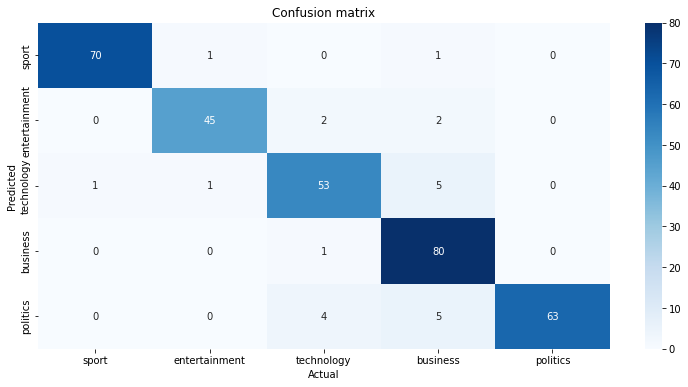

In [22]:
aux_df = df[['Category', 'CategoryID']].drop_duplicates().sort_values('CategoryID')
conf_matrix = confusion_matrix(test_labels, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.savefig('NB1_confusion.png',bbox_inches = "tight")

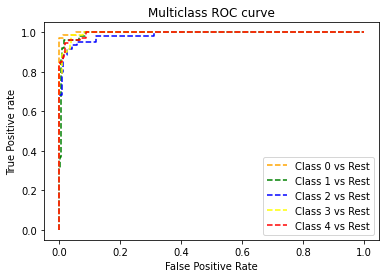

In [28]:
fpr = {}
tpr = {}
thresh ={}
y_prob_pred_cnb = mnbc.predict_proba(test_features1)
n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_labels, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC');

In [29]:
roc_auc_score(test_labels, y_prob_pred_cnb, multi_class='ovo', average='weighted')

0.9934611926939771

# Second Features

In [10]:
with open('train_features2.pkl',mode='rb')as file:
    train_features2=pickle.load(file)
with open('test_features2.pkl',mode='rb')as file:
    test_features2=pickle.load(file)

In [11]:
mnbc2 = MultinomialNB()
mnbc2

MultinomialNB()

In [12]:
mnbc2.fit(train_features2, train_labels)

MultinomialNB()

In [13]:
mnbc_pred2 = mnbc2.predict(test_features2)

In [14]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(train_labels, mnbc2.predict(train_features2)))

The training accuracy is: 
0.958223162347964


In [15]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(test_labels, mnbc_pred2))

The test accuracy is: 
0.9311377245508982


In [25]:
# Classification report
print("Classification report for Naive Bayes model")
print(classification_report(test_labels,mnbc_pred2))

Classification report for Naive Bayes model
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.96      0.90      0.93        49
           2       0.88      0.88      0.88        60
           3       0.87      0.99      0.92        81
           4       0.98      0.88      0.93        72

    accuracy                           0.93       334
   macro avg       0.94      0.93      0.93       334
weighted avg       0.93      0.93      0.93       334



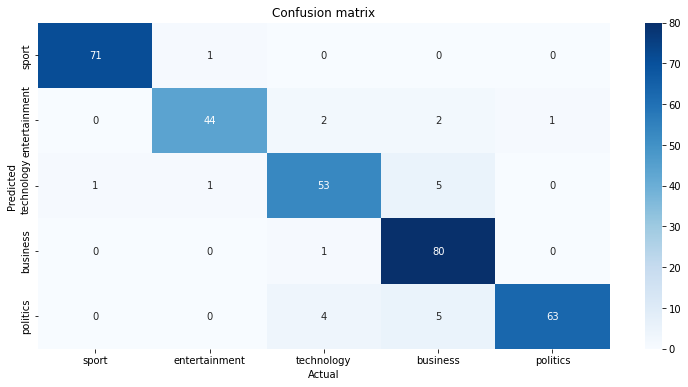

In [17]:
aux_df = df[['Category', 'CategoryID']].drop_duplicates().sort_values('CategoryID')
conf_matrix = confusion_matrix(test_labels, mnbc_pred2)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [18]:
d = {
     'Model': ['Multinomial Naïve Bayes1','Multinomial Naïve Bayes2'],
     'Training Set Accuracy': [accuracy_score(train_labels, mnbc.predict(train_features1)),
                              accuracy_score(train_labels, mnbc2.predict(train_features2))],
     'Test Set Accuracy': [accuracy_score(test_labels, mnbc_pred),accuracy_score(test_labels, mnbc_pred2)]
}

df_models_mnbc = pd.DataFrame(d)
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes1,0.953993,0.931138
1,Multinomial Naïve Bayes2,0.958223,0.931138


In [30]:
df_models_mnbc.to_pickle('NB.accuracy.pkl')